In [1]:
import jaxlib
print(jaxlib.__version__)


0.5.3


In [2]:
import psutil
import time
import jax.numpy as jnp

def monitor_during(fn, *args):
    from threading import Thread

    def monitor():
        for _ in range(5):
            print("CPU per-core:", psutil.cpu_percent(percpu=True))
            time.sleep(1)

    t = Thread(target=monitor)
    t.start()

    result = fn(*args)
    t.join()
    return result

# Example JAX workload
def jax_workload():
    x = jnp.ones((10000, 10000))
    return x @ x

monitor_during(jax_workload)


CPU per-core: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
CPU per-core: [0.0, 65.3, 0.0, 64.4, 0.0, 75.0, 1.0, 69.7, 0.0, 66.0, 0.0, 100.0, 0.0, 0.0, 1.0, 1.0, 100.0, 0.0, 1.0, 0.0]
CPU per-core: [0.0, 100.0, 0.0, 100.0, 0.0, 100.0, 0.0, 100.0, 0.0, 100.0, 1.0, 100.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0]
CPU per-core: [0.0, 100.0, 0.0, 100.0, 0.0, 100.0, 0.0, 100.0, 1.0, 100.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0]
CPU per-core: [1.0, 100.0, 0.0, 100.0, 0.0, 99.0, 0.0, 100.0, 0.0, 100.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0]


Array([[10000., 10000., 10000., ..., 10000., 10000., 10000.],
       [10000., 10000., 10000., ..., 10000., 10000., 10000.],
       [10000., 10000., 10000., ..., 10000., 10000., 10000.],
       ...,
       [10000., 10000., 10000., ..., 10000., 10000., 10000.],
       [10000., 10000., 10000., ..., 10000., 10000., 10000.],
       [10000., 10000., 10000., ..., 10000., 10000., 10000.]],      dtype=float32)

In [4]:
jax.config.update("jax_num_threads", 20)



AttributeError: Unrecognized config option: jax_num_threads

In [5]:
print(jax.devices())
print(jax.process_index())

[CpuDevice(id=0)]
0


In [10]:
import psutil

# Check the number of CPU cores available
cpu_cores = psutil.cpu_count(logical=True)
print(f"Available CPU cores: {cpu_cores}")

Available CPU cores: 20


In [8]:
import jax
import jax.numpy as jnp

print(jax.devices())

x = jnp.ones((1000, 1000))
print(jnp.dot(x, x).block_until_ready())


[CudaDevice(id=0)]
[[1000. 1000. 1000. ... 1000. 1000. 1000.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]
 ...
 [1000. 1000. 1000. ... 1000. 1000. 1000.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]]


In [9]:
print(x.addressable_data(0))


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [5]:
import jax.numpy as jnp
jnp.arange(-180, 180, 10, dtype=jnp.float32)

Array([-180., -170., -160., -150., -140., -130., -120., -110., -100.,
        -90.,  -80.,  -70.,  -60.,  -50.,  -40.,  -30.,  -20.,  -10.,
          0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.],      dtype=float32)

In [10]:
import jax
import jax.numpy as jnp

# Create the array
arr = jnp.arange(-180, 180, 10, dtype=jnp.float32)

# Explicitly move the array to the GPU
arr_on_gpu = jax.device_put(arr, device=jax.devices('gpu')[0])

# Check the device placement
print(arr_on_gpu.device())  # Should show GPU as the device


TypeError: 'jaxlib.xla_extension.Device' object is not callable

In [19]:
import jax
import jax.numpy as jnp

# Create the array
arr = jnp.arange(-180, 180, 10, dtype=jnp.float32)

# Explicitly move the array to the GPU
arr_on_gpu = jax.device_put(arr, device=jax.devices('gpu')[0])

# Check the device placement
print(arr_on_gpu.device)  # Should show GPU as the device


cuda:0


In [1]:
import os
os.environ['JAX_PLATFORMS'] = 'cpu'
print(os.cpu_count())
os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())

import os

os.environ["XLA_FLAGS"] = "--xla_cpu_multi_thread_eigen=true intra_op_parallelism_threads=20"
os.environ["OMP_NUM_THREADS"] = "20"
os.environ["OPENBLAS_NUM_THREADS"] = "20"
os.environ["MKL_NUM_THREADS"] = "20"

import jax


import jax
import jax.numpy as jnp
import flax.linen as nn
import optax
import gymnasium as gym
from sbx.common.policies import BaseJaxPolicy, Flatten
from flax.training.train_state import TrainState
from sbx.ppo.policies import Actor, Critic, PPOPolicy
from gymnasium import spaces
from gymnasium.spaces import Discrete, Box
import tensorflow_probability.substrates.jax as tfp
from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv

import os
import random
import numpy as np
import pandas as pd
import time
import json
import torch
import matplotlib.pyplot as plt
from jax import vmap, pmap
import distrax
from dataclasses import dataclass, field

from sbx.ppo.ppo import PPO

from typing import Sequence
from stable_baselines3.common.type_aliases import Schedule



20


In [3]:
# Load Data
df = pd.read_csv("MGOL.csv")  # Replace with actual file
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%y %H:%M')
df.set_index('datetime', inplace=True)

df.index = df.index + pd.Timedelta(hours=3)
df.index.name = 'Date'
df = df.drop(columns=['symbol', 'frame'])
df = df.iloc[:30]  # Select the first 30 rows

df = df[['close']]
df

,close
Date,
2025-02-07 04:00:00,0.3386
2025-02-07 04:01:00,0.3265
2025-02-07 04:02:00,0.3288
2025-02-07 04:03:00,0.3123
2025-02-07 04:04:00,0.3124
2025-02-07 04:05:00,0.3011
2025-02-07 04:06:00,0.3069
2025-02-07 04:07:00,0.3115
2025-02-07 04:08:00,0.3137


In [4]:
# TradingEnv

debug = False

class TradingEnv(gym.Env):
    def seed(self, seed=None):
        np.random.seed(seed)
        random.seed(seed)
        return [seed]
        
    def __init__(self, df):
        super(TradingEnv, self).__init__()
        self.df = df
        self.current_step = 0
        self.initial_balance = 10000
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.shares = 0
        self.buy_price = 0
        self.total_reward = 0
        self.position_open = False
        self.round_trip_trades = 0

        # Action Space: 0 = Hold, 1 = Buy, 2 = Sell
        self.action_space = Discrete(3)

        # Observation space must use NumPy
        self.obs_shape = len(self.df.columns) + 7
        self.observation_space = Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

    def get_action_mask(self) -> jnp.ndarray:
        #"""Returns a JAX binary mask indicating valid actions."""
        action_mask = jnp.zeros(self.action_space.n, dtype=jnp.float32)
        action_mask = action_mask.at[0].set(1)  # Hold is always valid
        if not self.position_open:
            action_mask = action_mask.at[1].set(1)  # Buy only if no position open
        if self.position_open:
            action_mask = action_mask.at[2].set(1)  # Sell only if position open
        return action_mask

    def get_obs(self) -> jnp.ndarray:
        """ Generates the current observation in JAX."""
        if self.current_step >= len(self.df):
            return jnp.zeros(self.obs_shape, dtype=jnp.float32)  # or some terminal obs
    
        close_price = self.df.iloc[self.current_step]["close"]
        obs = jnp.concatenate([
            #jnp.array(self.df.iloc[self.current_step][["open", "high", "low", "close", "volume"]].values, dtype=jnp.float32),  # (5,)
            jnp.array(self.df.iloc[self.current_step][["close"]].values, dtype=jnp.float32),  # (5,)
            jnp.array([self.shares, self.balance, self.net_worth, self.current_step], dtype=jnp.float32)  # (4,)
        ])
    
        # Get action mask and combine
        action_mask = self.get_action_mask()  # Ensure get_action_mask() is correctly implemented
        obs = jnp.concatenate([obs, jnp.array(action_mask, dtype=jnp.float32)])
    
        return obs


    def reset(self, seed=None, options=None):
        #"""Resets the environment and returns an initial NumPy observation."""
        self.current_step = 0
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.shares = 0
        self.position_open = False
        self.round_trip_trades = 0

        obs = self.get_obs()  # JAX array
        obs = np.array(obs, dtype=np.float32)  # Convert to NumPy for Gymnasium compatibility

        if debug:
            print(f"Environment Reset: Initial Observation (shape {obs.shape}): {obs}")
        return obs, {}

    def step(self, action):
        #"""Take a step in the environment and return a NumPy-compatible output."""
    
        # Debugging: Check action format
        if debug: print(f"Action received: {action}, shape: {np.shape(action)}")
    
        if isinstance(action, (np.ndarray, jnp.ndarray)):
            if action.shape == (3,):  # If it's a vector of logits
                action = np.argmax(action)  # Choose the action with highest probability
            else:
                action = int(action.item())  # Convert to scalar


    
        action = np.clip(action, 0, 2)  # Ensure action is within [0, 1, 2]
    
        if debug:
            print(f"Action taken: {action}")
    
        close_price = self.df.iloc[self.current_step]["close"]
        reward = 0
        done = False
    
        # Action Handling
        if action == 1 and not self.position_open:
            self.shares = 1000
            self.balance -= close_price * self.shares
            self.position_open = True
            self.buy_price = close_price
            if debug:
                print("Bought shares")
    
        elif action == 2 and self.position_open:
            self.balance += close_price * self.shares
            reward = (close_price - self.buy_price) * self.shares
            self.shares = 0
            self.buy_price = 0
            self.position_open = False
            self.round_trip_trades += 1
            if debug:
                print(f"Sold shares, Reward: {reward}")
    
        self.net_worth = self.balance + (self.shares * close_price)
        done = self.round_trip_trades >= 10 or self.net_worth <= 0 or self.current_step >= len(self.df) - 1
    
        if debug:
            print(f"Net Worth: {self.net_worth}, Total Reward: {self.total_reward}")
    
        self.current_step += 1
    
        obs = self.get_obs()  # JAX array
        obs = np.array(obs, dtype=np.float32)  # Convert to NumPy
    
        info = {
            "valid_actions": [0, 1, 2],
            "action_mask": np.array(self.get_action_mask(), dtype=np.float32)  # Convert JAX to NumPy
        }
    
        # ✅ Ensure action shape is (1,)
        action = np.array(action, dtype=np.int32).reshape(-1, 1)  # Fix shape
    
        return obs, float(reward), bool(done), False, info



In [5]:
class ActionMasker(gym.Wrapper):
    def __init__(self, env, mask_fn):
        super(ActionMasker, self).__init__(env)
        self.mask_fn = mask_fn

    def step(self, action):
        obs, reward, done, truncated, info = self.env.step(action)
        action_mask = self.mask_fn(self.env)
        info["action_mask"] = action_mask  # Add the action mask to info
        return obs, reward, done, truncated, info

    def reset(self, **kwargs):
        obs, info = self.env.reset(**kwargs)
        action_mask = self.mask_fn(self.env)
        info["action_mask"] = action_mask  # Add action mask to info at reset
        return obs, info

def mask_fn(env: gym.Env) -> np.ndarray:
    return np.array(env.get_action_mask(), dtype=np.float32)

import pickle

# Initialize the custom TradingEnv environment
env1 = TradingEnv(df)  # Your custom environment

# Wrap the environment with ActionMasker to apply action masking
env_masked = ActionMasker(env1, mask_fn)  # Apply the ActionMasker wrapper

pickle.dumps(env_masked)  # This should succeed without error.

# Define the number of CPU cores to use
num_envs = os.cpu_count()  # You can adjust this depending on your CPU cores

# Function that creates ONE wrapped env
def make_env(seed):
    def _init():
        env = TradingEnv(df)
        env.seed(seed)  # Seed BEFORE wrapping
        env = ActionMasker(env, mask_fn)  # Then apply ActionMasker
        return env
    return _init

# SubprocVecEnv takes a list of callables
env = SubprocVecEnv([make_env(i) for i in range(num_envs)])

#env = DummyVecEnv([make_env(i) for i in range(num_cpu)])

# Debug: Check final action space
print("Final env.action_space:", env.action_space)
print("Type:", type(env.action_space))

Final env.action_space: Discrete(3)
Type: <class 'gymnasium.spaces.discrete.Discrete'>


In [6]:
# Train model
#jax.config.update("jax_platform_name", "cpu")
# --- Main entry point ---
if __name__ == "__main__":
    # Disable CUDA devices
    #os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable CUDA
    
    #import os
    #os.environ["JAX_PLATFORM_NAME"] = "cpu"
    
    import jax
    print("JAX devices:", jax.devices())  # Should show GpuDevice(s)

    # Create the environment vectorization
    from stable_baselines3.common.vec_env import SubprocVecEnv
    env = SubprocVecEnv([make_env(i) for i in range(num_envs)])
    print("Final env.action_space:", env.action_space)
    
    import multiprocessing as mp
    mp.set_start_method("spawn", force=True)
    
    # --------------------------
    # Trading Environment with Action Masking
    # --------------------------
    
    # Print the action space
    print("Action space:", env.action_space)
    
    # --------------------------
    # Fix numpy bool8 issue
    # --------------------------
    np.bool8 = np.bool_  # Workaround for legacy numpy versions
    
    # --------------------------
    # JAX Configuration
    # --------------------------
    
    jax.config.update("jax_disable_jit", False)
    jax.config.update("jax_debug_nans", False)
    
    # --------------------------
    # File paths
    # --------------------------
    RESULTS_FILE = "sbx_ppo_timing_results.json"
    
    # --------------------------
    # Fixed Hyperparameters for SBX
    # --------------------------
    SBX_CONFIG = {
        "learning_rate": 3e-4,
        "gamma": 0.99,
        "gae_lambda": 0.95,
        "clip_range": 0.2,
        "batch_size": 1024,  # Adjusted to a factor of n_steps * n_envs if needed
        "n_steps": 2048,
        "n_epochs": 5,
        "policy_kwargs": {
            "net_arch": [128, 128],
            "activation_fn": nn.tanh,
            "ortho_init": False,
            "optimizer_class": optax.adamw,
            "optimizer_kwargs": {"eps": 1e-5, "weight_decay": 1e-4},
        }
    }
    
    
    # --------------------------
    # 2. Custom PPO Policy Built on Flax
    # --------------------------
    
    class MaskedPPOPolicy(PPOPolicy):
        net_arch: list
        action_space: gym.spaces.Space  # Ensure this is defined as a parameter
        activation_fn: callable = nn.tanh  # Default activation function
    
        def __init__(self, observation_space, action_space, lr_schedule, **policy_kwargs):
            super().__init__(
                observation_space=observation_space,
                action_space=action_space,
                lr_schedule=lr_schedule,
                **policy_kwargs  # Pass any additional arguments from policy_kwargs
            )
            self.action_space = action_space
            
            # Extract net_arch and activation_fn from policy_kwargs, with defaults
            self.net_arch = policy_kwargs.get('net_arch', [64, 64])  # Default net_arch if not provided
            self.activation_fn = policy_kwargs.get('activation_fn', nn.tanh)  # Default activation_fn if not provided
    
            print(f"net_arch: {self.net_arch}")  # Debug print statement
            
            # Ensure net_arch is iterable and contains integers
            if not isinstance(self.net_arch, list):
                raise TypeError("net_arch must be a list of integers")
            if not all(isinstance(x, int) for x in self.net_arch):
                raise TypeError("Each element of net_arch must be an integer")
            
            # Define layers in __init__
            self.dense_layers = [nn.Dense(size) for size in self.net_arch]
            if isinstance(action_space, gym.spaces.Discrete):
                self.actor_head = nn.Dense(action_space.n)
            else:
                raise ValueError(f"Expected Discrete action space, but got: {type(action_space)}")
    
            self.value_head = nn.Dense(1)  # Value head (for value function)
    
        def build(self, key: jax.Array, lr_schedule: Schedule, max_grad_norm: float) -> jax.Array:
            # Optionally override the build function here if MaskedPPOPolicy has custom behavior
            # Call the parent's build function to initialize the actor and critic networks
            key = super().build(key, lr_schedule, max_grad_norm)
            
            # Custom modifications or initialization for MaskedPPOPolicy
            # e.g., if you need to alter the action space or modify networks
            
            return key
    
        def __call__(self, x):
            # Forward pass using the layers initialized in __init__
            x = self.dense_layers[0](x)
            for layer in self.dense_layers[1:]:
                x = self.activation_fn(layer(x))
            value = self.value_head(x)
            logits = self.actor_head(x)  # Logits for action selection
            return logits, value
    
    
    # --------------------------
    # 4. Instantiate and Train
    # --------------------------
    
    # Print the action space
    print("Action space:", env.action_space)
    
    model = PPO(
        policy=MaskedPPOPolicy,
        env=env,
        verbose=1,
        tensorboard_log='./tensorboard_logs'
    )
    
    # --------------------------
    # 5. Examples of vmap and pmap Usage
    # --------------------------
    #def vectorized_operation(inputs):
    #    """Example using vmap to square each element in the input batch."""
    #    def process_input(x):
    #        return x ** 2
    #    return vmap(process_input)(inputs)
    
    #def parallelized_operation(inputs):
    #    """Example using pmap to square each element in the input batch across devices."""
    #    def process_input(x):
    #        return x ** 2
    #    return pmap(process_input)(inputs)
    
    # Example usage of vmap and pmap:
    #sample_inputs = jnp.array([1, 2, 3, 4])
    #print("vmap result:", vectorized_operation(sample_inputs))
    #if jax.device_count() > 1:
    #    # Create an input array per device
    #    device_inputs = jnp.stack([sample_inputs] * jax.device_count())
    #    print("pmap result:", parallelized_operation(device_inputs))
    #else:
    #    print("pmap: Only one device available; skipping pmap demonstration.")
    
    # --------------------------
    # PPO Training Code (unchanged)
    # --------------------------
    
    # Record the start time
    start_time = time.time()
    
    # Start training for 500,000 timesteps
    model.learn(total_timesteps=500_000, progress_bar=False, tb_log_name="sbx_ppo")
    
    # Calculate and print the elapsed time
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Print the elapsed time in seconds
    print(f"Training completed in {elapsed_time:.2f} seconds.")
    
    model.save("sbx_ppo_model")

JAX devices: [CpuDevice(id=0)]
Final env.action_space: Discrete(3)
Action space: Discrete(3)
Action space: Discrete(3)
Using cuda device
net_arch: [64, 64]
Logging to ./tensorboard_logs/sbx_ppo_11
------------------------------
| time/              |       |
|    fps             | 656   |
|    iterations      | 1     |
|    time_elapsed    | 62    |
|    total_timesteps | 40960 |
------------------------------
------------------------------------
| time/                 |          |
|    fps                | 635      |
|    iterations         | 2        |
|    time_elapsed       | 128      |
|    total_timesteps    | 81920    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.00192  |
|    n_updates          | 10       |
|    pg_loss            | -0.0132  |
|    value_loss         | 36       |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 639  

KeyboardInterrupt: 

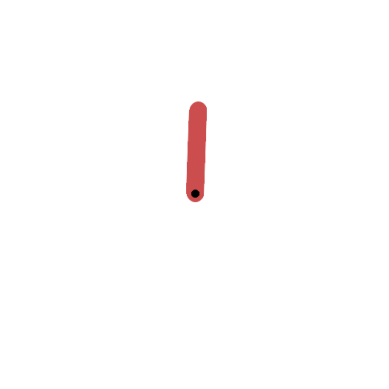

In [4]:
import gymnasium as gym
from sbx import TQC
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Create environment with RGB rendering
env = gym.make("Pendulum-v1", render_mode="rgb_array")

# Train model
model = TQC("MlpPolicy", env, verbose=1, device="cuda")
model.learn(total_timesteps=10_000, progress_bar=True)

# Reset environment
obs, _ = env.reset()

# Loop for visualization
for _ in range(300):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)

    # Get the frame to display
    frame = env.render()

    # Plot using matplotlib
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())
    time.sleep(0.05)

    if terminated or truncated:
        obs, _ = env.reset()

env.close()


KeyboardInterrupt: 

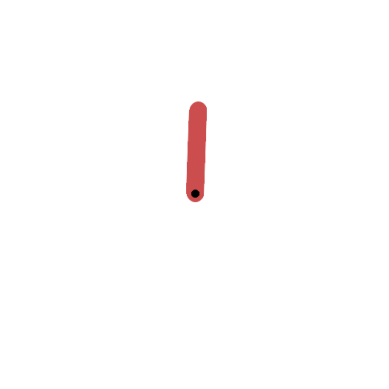

In [5]:
# Reset environment
obs, _ = env.reset()

# Loop for visualization
for _ in range(300):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)

    # Get the frame to display
    frame = env.render()

    # Plot using matplotlib
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())
    time.sleep(0.05)

    if terminated or truncated:
        obs, _ = env.reset()

env.close()